In [188]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [189]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0


In [190]:
# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [191]:
Indianapolis_Housing = pd.read_csv("Indianapolis_Housing_Cleaned.csv")
Indianapolis_Housing.head()
Indianapolis_Housing = Indianapolis_Housing.drop(["Unnamed: 0", "Unnamed: 0.1", "Date", "Year"], axis=1)


In [192]:
#X = Indianapolis_Housing_February[["Integer_Year", "Zip_Code_Integer", "No. of Bedrooms", 
                                   #"Median Market Value (Single Family)",
                                  #"Median List Price per SqFt Calculated",
                                  #"Median List Price Calculated"]].values

#y = Indianapolis_Housing_February["Median Bedroom Price"].values
#y = y.reshape(-1, 1)
#print(X.shape, y.shape)

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [194]:
#X_train, X_test, y_train, y_test = train_test_split(
    #X, y, random_state=1)

In [195]:
#X_scaler = MinMaxScaler().fit(X_train)
#y_scaler = MinMaxScaler().fit(y_train)
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [196]:
Indianapolis_Housing['Zip_Code'] = Indianapolis_Housing['Zip_Code'].map({46220: '46220', 46219: '46219', 46227: '46227', 46214: '46214'})
Indianapolis_Housing = pd.get_dummies(Indianapolis_Housing,columns=["Zip_Code"], prefix='', prefix_sep='')

Indianapolis_Housing["No. of Bedrooms"] = Indianapolis_Housing['No. of Bedrooms'].map({1: '1 Bedroom', 2: '2 Bedroom', 3: '3 Bedroom', 4: '4 Bedroom', 5: '5 Bedroom'})
Indianapolis_Housing = pd.get_dummies(Indianapolis_Housing,columns=["No. of Bedrooms"], prefix='', prefix_sep='')

Indianapolis_Housing["Month"] = Indianapolis_Housing['Month'].map({1: 'January', 2: 'February', 3: 'March',
                                                                   4: 'April', 5: 'May', 6: 'June',
                                                                   7: 'July', 8: 'August', 9: 'September',
                                                                   10: 'October', 11: 'November', 12: 'December'})
Indianapolis_Housing = pd.get_dummies(Indianapolis_Housing,columns=["Month"], prefix='', prefix_sep='')

Indianapolis_Housing


,Integer_Year,Median Bedroom Price,Median List Price Calculated,Median List Price per SqFt Calculated,Median Market Value (Single Family),46214,46219,46220,46227,1 Bedroom,...,December,February,January,July,June,March,May,November,October,September
0,2,112900.0,125900.776510,70.844378,126400.0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
1,3,118000.0,141319.035095,66.742279,151900.0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,4,122400.0,141325.632469,71.362276,150600.0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,5,97772.0,128316.922949,45.601351,154967.0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,6,96466.0,132249.910303,54.573311,155566.0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,20,141884.0,117900.000000,75.297652,119662.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4746,21,153075.0,128900.000000,71.947874,126031.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4747,22,161040.0,135000.000000,79.283366,136849.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4748,23,179149.0,149900.000000,91.824038,152612.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [197]:
Indianapolis_Housing.columns

Index(['Integer_Year', 'Median Bedroom Price', 'Median List Price Calculated',
       'Median List Price per SqFt Calculated',
       'Median Market Value (Single Family)', '46214', '46219', '46220',
       '46227', '1 Bedroom', '2 Bedroom', '3 Bedroom', '4 Bedroom',
       '5 Bedroom', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September'],
      dtype='object')

In [198]:
Indianapolis_Housing.to_csv("Indianapolis_Housing_Predictions.csv")

In [199]:
train_dataset = Indianapolis_Housing.sample(frac=0.8,random_state=0)
test_dataset = Indianapolis_Housing.drop(train_dataset.index)

In [200]:
#sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [201]:
train_stats = train_dataset.describe()
train_stats.pop("Median Bedroom Price")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Integer_Year,3800.0,13.970000,6.747906,1.000000,8.000000,15.000000,20.000000,25.000000
Median List Price Calculated,3800.0,128752.238773,37946.841456,10615.977352,105056.378985,121172.790037,149792.654093,282808.243734
Median List Price per SqFt Calculated,3800.0,88.224451,27.386544,38.810310,70.150075,78.252037,97.949826,191.852081
Median Market Value (Single Family),3800.0,127319.665263,39635.153313,70889.000000,99880.250000,115814.000000,156900.000000,249753.000000
46214,3800.0,0.251579,0.433978,0.000000,0.000000,0.000000,1.000000,1.000000
46219,3800.0,0.230263,0.421057,0.000000,0.000000,0.000000,0.000000,1.000000
46220,3800.0,0.292632,0.455031,0.000000,0.000000,0.000000,1.000000,1.000000
46227,3800.0,0.225526,0.417983,0.000000,0.000000,0.000000,0.000000,1.000000
1 Bedroom,3800.0,0.169474,0.375219,0.000000,0.000000,0.000000,0.000000,1.000000
2 Bedroom,3800.0,0.213158,0.409592,0.000000,0.000000,0.000000,0.000000,1.000000


In [202]:
train_labels = train_dataset.pop('Median Bedroom Price')
test_labels = test_dataset.pop('Median Bedroom Price')

In [203]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [111]:
train_dataset.columns

Index(['Integer_Year', 'Median List Price Calculated',
       'Median List Price per SqFt Calculated',
       'Median Market Value (Single Family)', '46214', '46219', '46220',
       '46227', '1 Bedroom', '2 Bedroom', '3 Bedroom', '4 Bedroom',
       '5 Bedroom', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September'],
      dtype='object')

In [112]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [113]:
model = build_model()

In [114]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                1664      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 5,889
Trainable params: 5,889
Non-trainable params: 0
_________________________________________________________________


In [115]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result


array([[0.17093363],
       [0.39358872],
       [0.5769901 ],
       [0.56212705],
       [0.80974746],
       [0.3060953 ],
       [0.26052773],
       [0.5395286 ],
       [0.25940824],
       [0.08702235]], dtype=float32)

In [116]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:23428085048.5895,  mae:135035.7500,  mse:23428085760.0000,  val_loss:23343014771.8737,  val_mae:135517.5938,  val_mse:23343015936.0000,  
....................................................................................................
Epoch: 100, loss:73572442.0421,  mae:6034.9888,  mse:73572440.0000,  val_loss:72111155.2842,  val_mae:6057.7637,  val_mse:72111152.0000,  
....................................................................................................
Epoch: 200, loss:36012087.2526,  mae:4202.8252,  mse:36012084.0000,  val_loss:44680413.5579,  val_mae:4695.2739,  val_mse:44680416.0000,  
....................................................................................................
Epoch: 300, loss:26534111.1053,  mae:3527.1497,  mse:26534112.0000,  val_loss:37169688.0421,  val_mae:4124.4023,  val_mse:37169696.0000,  
....................................................................................................
Epoch: 400, loss:22199434

In [117]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
#print(hist["mse"].max())

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,1.603947e+07,2580.127686,16039475.0,2.581914e+07,3210.369141,25819142.0,995
996,1.596164e+07,2567.825684,15961640.0,2.626318e+07,3216.848389,26263180.0,996
997,1.605111e+07,2570.066895,16051102.0,2.536984e+07,3197.315430,25369842.0,997
998,1.608185e+07,2567.907715,16081849.0,2.509177e+07,3194.687500,25091768.0,998
999,1.597586e+07,2576.771240,15975861.0,2.704002e+07,3267.327637,27040018.0,999


In [118]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [Median Bedroom Price]')

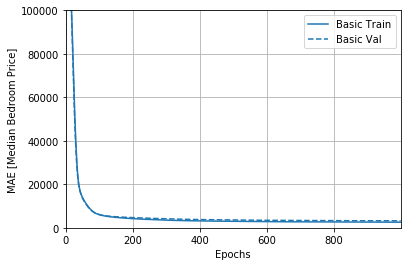

In [119]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 100000])
plt.ylabel('MAE [Median Bedroom Price]')

Text(0, 0.5, 'MSE [Median Bedroom Price]')

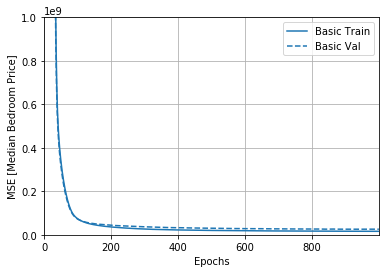

In [120]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 1000000000])
plt.ylabel('MSE [Median Bedroom Price]')

In [121]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} ".format(mae))

950/950 - 0s - loss: 21471396.1095 - mae: 3050.3452 - mse: 21471398.0000
Testing set Mean Abs Error: 3050.35 


In [122]:
loss, mae, mse = model.evaluate(normed_train_data, train_labels, verbose=2)

print("Training set Mean Abs Error: {:5.2f} ".format(mae))

3800/3800 - 0s - loss: 18161624.1558 - mae: 2705.1230 - mse: 18161626.0000
Training set Mean Abs Error: 2705.12 


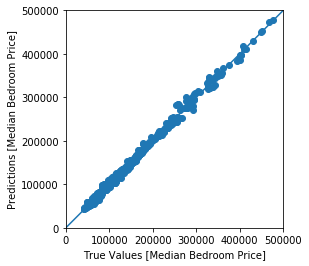

In [123]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Median Bedroom Price]')
plt.ylabel('Predictions [Median Bedroom Price]')
lims = [0, 500000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [124]:
test_predictions

array([104116.055, 110714.17 , 113004.37 , 153324.98 , 116175.6  ,
       132385.64 , 132765.16 , 155491.89 , 168295.7  , 166150.2  ,
       209382.02 , 227829.39 , 235360.3  , 251128.23 , 311279.72 ,
       341886.94 , 284632.22 , 288812.5  , 315232.16 , 347576.28 ,
       360469.9  , 397977.72 , 417077.06 ,  62096.047,  57571.508,
        59122.914,  58023.883,  47834.945,  49980.79 ,  73655.32 ,
        75956.63 ,  74983.82 ,  69451.49 ,  69229.08 ,  98008.51 ,
        85455.16 ,  81058.98 ,  89501.91 ,  76245.88 ,  77830.766,
        87368.5  , 105346.16 , 112567.805, 109942.6  , 117495.28 ,
       128972.35 , 113250.87 , 115851.586, 121512.65 , 119981.82 ,
        59343.55 ,  56120.234,  94547.14 ,  80366.24 ,  82336.29 ,
       115281.87 ,  93231.87 ,  94559.805,  88542.93 , 112526.05 ,
       130019.555, 126710.87 , 142713.89 , 141405.7  , 157508.88 ,
       153866.02 , 162881.92 ,  61047.22 ,  69216.71 ,  90891.945,
        77378.49 ,  75968.2  , 110244.445,  97146.56 , 103554.

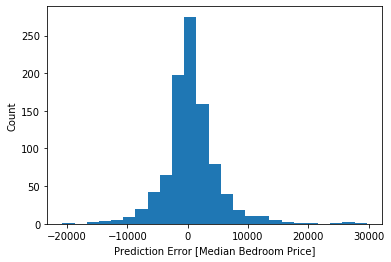

In [125]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Median Bedroom Price]")
_ = plt.ylabel("Count")

In [171]:
predictionsData = pd.read_csv("predictionsData.csv")


In [172]:
predictionsData = predictionsData.drop("Unnamed: 0", axis=1)

In [173]:
predictionsData = predictionsData[['Integer_Year', 'Median List Price Calculated',
       'Median List Price per SqFt Calculated',
       'Median Market Value (Single Family)', '46214', '46219', '46220',
       '46227', '1 Bedroom', '2 Bedroom', '3 Bedroom', '4 Bedroom',
       '5 Bedroom', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September']]

predictionsData.head()

,Integer_Year,Median List Price Calculated,Median List Price per SqFt Calculated,Median Market Value (Single Family),46214,46219,46220,46227,1 Bedroom,2 Bedroom,...,December,February,January,July,June,March,May,November,October,September
0,25,189473.018375,130.178332,202641.007899,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,25,192833.784967,133.004470,204674.278603,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,25,192778.387716,132.684530,204424.325703,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,25,193129.236975,132.844500,204496.427501,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,25,191079.538669,130.871536,203501.422688,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [174]:
print(predictionsData.columns)
print(train_dataset.columns)

Index(['Integer_Year', 'Median List Price Calculated',
       'Median List Price per SqFt Calculated',
       'Median Market Value (Single Family)', '46214', '46219', '46220',
       '46227', '1 Bedroom', '2 Bedroom', '3 Bedroom', '4 Bedroom',
       '5 Bedroom', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September'],
      dtype='object')
Index(['Integer_Year', 'Median List Price Calculated',
       'Median List Price per SqFt Calculated',
       'Median Market Value (Single Family)', '46214', '46219', '46220',
       '46227', '1 Bedroom', '2 Bedroom', '3 Bedroom', '4 Bedroom',
       '5 Bedroom', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September'],
      dtype='object')


In [175]:
predictionsData.dtypes

Integer_Year                               int64
Median List Price Calculated             float64
Median List Price per SqFt Calculated    float64
Median Market Value (Single Family)      float64
46214                                      int64
46219                                      int64
46220                                      int64
46227                                      int64
1 Bedroom                                  int64
2 Bedroom                                  int64
3 Bedroom                                  int64
4 Bedroom                                  int64
5 Bedroom                                  int64
April                                      int64
August                                     int64
December                                   int64
February                                   int64
January                                    int64
July                                       int64
June                                       int64
March               

In [176]:
import numpy as np
predictionsData[['46214', '46219', '46220',
       '46227', '1 Bedroom', '2 Bedroom', '3 Bedroom', '4 Bedroom',
       '5 Bedroom', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September']] = predictionsData[['46214', '46219', '46220',
       '46227', '1 Bedroom', '2 Bedroom', '3 Bedroom', '4 Bedroom',
       '5 Bedroom', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September']].astype(np.uint8)


In [177]:
predictionsData.dtypes

Integer_Year                               int64
Median List Price Calculated             float64
Median List Price per SqFt Calculated    float64
Median Market Value (Single Family)      float64
46214                                      uint8
46219                                      uint8
46220                                      uint8
46227                                      uint8
1 Bedroom                                  uint8
2 Bedroom                                  uint8
3 Bedroom                                  uint8
4 Bedroom                                  uint8
5 Bedroom                                  uint8
April                                      uint8
August                                     uint8
December                                   uint8
February                                   uint8
January                                    uint8
July                                       uint8
June                                       uint8
March               

In [178]:
train_dataset.dtypes

Integer_Year                               int64
Median List Price Calculated             float64
Median List Price per SqFt Calculated    float64
Median Market Value (Single Family)      float64
46214                                      uint8
46219                                      uint8
46220                                      uint8
46227                                      uint8
1 Bedroom                                  uint8
2 Bedroom                                  uint8
3 Bedroom                                  uint8
4 Bedroom                                  uint8
5 Bedroom                                  uint8
April                                      uint8
August                                     uint8
December                                   uint8
February                                   uint8
January                                    uint8
July                                       uint8
June                                       uint8
March               

In [204]:

normed_prediction_data = norm(predictionsData)


In [205]:
normed_prediction_data.head()

,Integer_Year,Median List Price Calculated,Median List Price per SqFt Calculated,Median Market Value (Single Family),46214,46219,46220,46227,1 Bedroom,2 Bedroom,...,December,February,January,July,June,March,May,November,October,September
0,1.634581,1.600154,1.531916,1.900367,-0.579705,-0.54687,1.554551,-0.539558,2.213443,-0.520415,...,-0.2642,-0.292201,3.081353,-0.293261,-0.295372,-0.303199,-0.325437,-0.300085,-0.323456,-0.292731
1,1.634581,1.688719,1.635110,1.951667,-0.579705,-0.54687,1.554551,-0.539558,-0.451666,1.921038,...,-0.2642,-0.292201,3.081353,-0.293261,-0.295372,-0.303199,-0.325437,-0.300085,-0.323456,-0.292731
2,1.634581,1.687259,1.623428,1.945360,-0.579705,-0.54687,1.554551,-0.539558,-0.451666,-0.520415,...,-0.2642,-0.292201,3.081353,-0.293261,-0.295372,-0.303199,-0.325437,-0.300085,-0.323456,-0.292731
3,1.634581,1.696505,1.629269,1.947180,-0.579705,-0.54687,1.554551,-0.539558,-0.451666,-0.520415,...,-0.2642,-0.292201,3.081353,-0.293261,-0.295372,-0.303199,-0.325437,-0.300085,-0.323456,-0.292731
4,1.634581,1.642490,1.557228,1.922076,-0.579705,-0.54687,1.554551,-0.539558,-0.451666,-0.520415,...,-0.2642,-0.292201,3.081353,-0.293261,-0.295372,-0.303199,-0.325437,-0.300085,-0.323456,-0.292731


In [207]:
test_predictions = model.predict(normed_prediction_data).flatten()

In [208]:
test_predictions

array([134363.45 , 182293.23 , 203690.   , 298562.66 , 417640.84 ,
       134705.55 , 183301.64 , 206450.33 , 297880.34 , 418812.47 ,
       135697.1  , 180835.31 , 204950.34 , 301370.72 , 411525.66 ,
       128391.26 , 176750.17 , 202343.53 , 295977.6  , 414465.84 ,
       132827.02 , 181133.89 , 204824.97 , 300811.44 , 417654.9  ,
       131702.11 , 180405.53 , 204005.86 , 301128.56 , 416166.4  ,
       134807.77 , 181982.77 , 206633.83 , 301015.97 , 415187.22 ,
       132171.95 , 181016.88 , 203457.2  , 299466.97 , 417242.62 ,
       134477.86 , 180558.83 , 206810.97 , 303728.75 , 419465.44 ,
       137044.8  , 181393.58 , 207553.84 , 301785.9  , 420741.53 ,
       133554.8  , 184230.45 , 206006.66 , 304777.84 , 422036.9  ,
       133846.05 , 180892.98 , 204377.77 , 299589.1  , 416988.94 ,
        66136.37 ,  87292.54 , 113180.586, 146420.8  , 171633.27 ,
        67313.63 ,  88928.945, 114193.445, 147686.8  , 173652.11 ,
        66625.336,  87293.26 , 113056.18 , 147197.42 , 169622.

In [209]:
model.save("Indianapolis_Housing.h5")